We need regularization in linear regression mainly to make the model more generalizable and less prone to overfitting, especially when we have many features or noisy data.

Linear regression cost function tries to find coefficients w1,w2,..wn that minimizes the sum of squared errors 
if 
- you have many features
- features are correlated
- there is noise in data then the model can give very large coefficients just to fit the training data perfectly. 
This often overfits- it works well on training data but fails on new and unseen data.

Ordinary Linear Regression Loss:
Loss=MSE 

With Regularization:
Loss=MSE+lamda*penalty 

In [1]:
!pip install numpy 
!pip install matplotlib
!pip install scikit-learn

c:\Users\sanju\OneDrive\Desktop\ML\ML specialization\week1\Files (1)\Files\home\jovyan\work\.venv\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=8.74107e-22): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


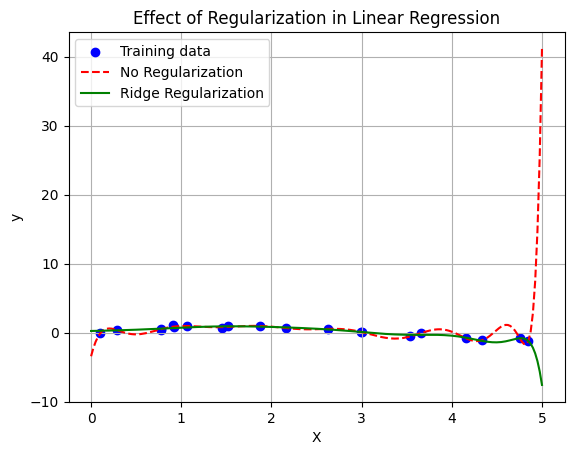

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression, Ridge 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.pipeline import make_pipeline 

#generate noisy non linear data 
np.random.seed(42)
X=np.sort(np.random.rand(20,1)*5, axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])

#create a very high degree polynomial to force overfitting 
degree=15 
poly_no_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression()) 
poly_ridge = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1.0)) 

#fit both models 
poly_no_reg.fit(X,y)
poly_ridge.fit(X,y) 

#Predict on smooth range 
X_test=np.linspace(0,5,200).reshape(-1,1)
y_no_reg=poly_no_reg.predict(X_test)
y_ridge = poly_ridge.predict(X_test)

plt.scatter(X, y, color='blue', label='Training data')
plt.plot(X_test, y_no_reg, 'r--', label='No Regularization')
plt.plot(X_test, y_ridge, 'g-', label='Ridge Regularization')
plt.title("Effect of Regularization in Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()
